- Surprise package documentation : https://surprise.readthedocs.io/en/stable/

# Instructions
For this assignment, you will be using the modular pipeline code that we've implemented in the previous session (https://github.com/EPITA-RecSys/recsys-ais-20/blob/master/notebooks/AIS_model-pipeline.ipynb)

You need to do the following tasks :
### Implement the evaluate and benchmarking_pipeline functions
### Extract the notebook functions in a python module and use them directly in a new notebook
- Create a folder in the root directory called recsys.
- In this folder, create a python module pipeline.py.
- Extract the different functions of the AIS_model-pipeline.ipynb notebook in this new module (pipeline.py).
- Create a new notebook where you will use the extracted benchmarking_pipeline function to do the benchamrking.

### Do the benchmarking of the 5 already used models along with NMF, SVD and SVD++ surprise algorithms.

## Bonus (+1 point) :
- Generalize the train function to use any surprise model kwargs and not only the KNN model.

### Note :
If in the 1st assignment you didn't manage to do the benchmarking with bar charts, you can do it for this assignment and it will be taken into account to improve your grade for the 1st assignment.

# Pipeline

# 1. Load data using load_builtin method

In [1]:
# Importing files from parent directory

import os, sys
currentdir = os.path.dirname(os.path.realpath("pipeline.py"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [2]:
from recsys.pipeline import pipeline

In [3]:
pipelineObj = pipeline()

In [4]:
ratings = pipelineObj.get_ratings(load_from_surprise=True)
ratings

# Split data in train and test sets

In [5]:
# sample random trainset and testset
# test set is made of 20% of the ratings.
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(ratings, test_size=.2, random_state=42)


In [6]:
trainset

In [7]:
trainset.n_users, trainset.n_items

(943, 1651)

In [8]:
type(testset)

list

# 2. Model

In [9]:
from surprise.prediction_algorithms.knns import KNNBasic # Using KNNBasic model
from surprise.prediction_algorithms.baseline_only import BaselineOnly # Using BaselineOnly model
from surprise.prediction_algorithms.matrix_factorization import NMF # Using NMF model
from surprise.prediction_algorithms.matrix_factorization import SVD # Using SVD model
from surprise.prediction_algorithms.matrix_factorization import SVDpp # Using SVDpp model

## Train a user based model using cosine similarity

In [10]:
sim_options_UserBased_Cosine = {'name': 'cosine',
                                'user_based': True  # compute  similarities between user-base
                               }

In [11]:
UserBased_Cosine_KNNBasic = pipelineObj.set_model_parameters(KNNBasic, sim_options=sim_options_UserBased_Cosine, k=40, min_k=1)

In [12]:
time_UserBased_Cosine_KNNBasic, UserBased_Cosine_KNNBasic = pipelineObj.evaluate_time_and_train(UserBased_Cosine_KNNBasic, trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


## Train a user based model using pearson correlation similarity

In [13]:
sim_options_UserBased_PearsonCorrelation = {'name': 'pearson_baseline',
                                            'user_based': True  # compute similarities between user-base
                               }

In [14]:
UserBased_PearsonCorrelation_KNNBasic =  pipelineObj.set_model_parameters(KNNBasic, sim_options=sim_options_UserBased_PearsonCorrelation, k=40, min_k=1)


In [15]:
time_UserBased_PearsonCorrelation_KNNBasic, UserBased_PearsonCorrelation_KNNBasic = pipelineObj.evaluate_time_and_train(UserBased_PearsonCorrelation_KNNBasic, trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


## Train a Item based model using cosine similarity

In [16]:
sim_options_ItemBased_Cosine = {'name': 'cosine',
                                'user_based': False  # compute  similarities between item-base
                               }

In [17]:
ItemBased_Cosine_KNNBasic = pipelineObj.set_model_parameters(KNNBasic, sim_options=sim_options_ItemBased_Cosine, k=40, min_k=1)

In [18]:
time_ItemBased_Cosine_KNNBasic, ItemBased_Cosine_KNNBasic = pipelineObj.evaluate_time_and_train(ItemBased_Cosine_KNNBasic, trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


## Train a Item based model using pearson correlation similarity

In [19]:
sim_options_ItemBased_PearsonCorrelation = {'name': 'pearson_baseline',
                                            'user_based': False  # compute similarities between item-base
                               }

In [20]:
ItemBased_PearsonCorrelation_KNNBasic = pipelineObj.set_model_parameters(KNNBasic, sim_options=sim_options_ItemBased_PearsonCorrelation, k=40, min_k=1)

In [21]:
time_ItemBased_PearsonCorrelation_KNNBasic, ItemBased_PearsonCorrelation_KNNBasic = pipelineObj.evaluate_time_and_train(ItemBased_PearsonCorrelation_KNNBasic, trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


## Train a BaselineOnly model

In [22]:
print('BaselineOnly model Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }

BaselineOnly model Using SGD


In [23]:
BaselineOnlyModel =  pipelineObj.set_model_parameters(BaselineOnly, bsl_options=bsl_options)

In [24]:
time_BaselineOnlyModel, BaselineOnlyModel = pipelineObj.evaluate_time_and_train(BaselineOnlyModel, trainset)

Estimating biases using sgd...


## Train a NMF model

In [25]:
NMF_model = pipelineObj.set_model_parameters(NMF, n_factors=15, n_epochs=50, biased=False)

In [26]:
time_NMF_model, NMF_model = pipelineObj.evaluate_time_and_train(NMF_model, trainset)

## Train a SVD model

In [27]:
SVD_model = pipelineObj.set_model_parameters(SVD, n_factors=15, n_epochs=50, biased=False, verbose=False)

In [28]:
time_SVD_model, SVD_model = pipelineObj.evaluate_time_and_train(SVD_model, trainset)

## Train a SVDpp model

In [29]:
# It was a mistake to run with n_epochs=50, make it 20 or less (Takes a lot of time)
SVDpp_model = pipelineObj.set_model_parameters(SVDpp, n_factors=15, n_epochs=20, init_mean=0, verbose=False)

In [30]:
time_SVDpp_model, SVDpp_model = pipelineObj.evaluate_time_and_train(SVDpp_model, trainset)

# 3. Make predictions with the model

## Predictions for user based model using cosine similarity

In [31]:
UserBased_Cosine_KNNBasic_predictions = pipelineObj.model_prediction(UserBased_Cosine_KNNBasic, testset)
UserBased_Cosine_KNNBasic_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=3.9988806593226958, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.024195267809441, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.920863971521688, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=4.275899932331823, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.37542669272407, details={'actual_k': 40, 'was_impossible': False})]

## Predictions for user based model using pearson correlation similarity

In [32]:
UserBased_PearsonCorrelation_KNNBasic_predictions = pipelineObj.model_prediction(UserBased_PearsonCorrelation_KNNBasic, testset)
UserBased_PearsonCorrelation_KNNBasic_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.143168682795533, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.167234022563786, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.4775085715515153, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=4.190251707736366, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.434149140412287, details={'actual_k': 30, 'was_impossible': False})]

## Predictions for Item based model using cosine similarity

In [33]:
ItemBased_Cosine_KNNBasic_predictions = pipelineObj.model_prediction(ItemBased_Cosine_KNNBasic, testset)
ItemBased_Cosine_KNNBasic_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.674038136709815, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.127176061681991, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.55351608506343, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.549641715257212, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.04966392708432, details={'actual_k': 40, 'was_impossible': False})]

## Predictions for Item based model using pearson correlation similarity

In [34]:
ItemBased_PearsonCorrelation_KNNBasic_predictions = pipelineObj.model_prediction(ItemBased_PearsonCorrelation_KNNBasic, testset)
ItemBased_PearsonCorrelation_KNNBasic_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.811647158658197, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.162009221840273, details={'actual_k': 28, 'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.532333118071294, details={'actual_k': 32, 'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.7923277092854133, details={'actual_k': 30, 'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.1900565766185456, details={'actual_k': 40, 'was_impossible': False})]

## Predictions for BaselineOnly model

In [35]:
BaselineOnlyModel_predictions = pipelineObj.model_prediction(BaselineOnlyModel, testset)
BaselineOnlyModel_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=3.669381430925591, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=3.649878804830684, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.5583648631496043, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.5818164578986074, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.4841382355265065, details={'was_impossible': False})]

## Predictions for NMF model

In [36]:
NMF_model_predictions = pipelineObj.model_prediction(NMF_model, testset)
NMF_model_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.619262824147635, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.26079434344615, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=4.016185004314076, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.9115539202811673, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=2.7856164450232264, details={'was_impossible': False})]

## Predictions for SVD model

In [37]:
SVD_model_predictions = pipelineObj.model_prediction(SVD_model, testset)
SVD_model_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.54695770397378, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.404602446556505, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.842108245502914, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.7564428629317796, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.0805060764208676, details={'was_impossible': False})]

## Predictions for SVDpp model

In [38]:
SVDpp_model_predictions = pipelineObj.model_prediction(SVDpp_model, testset)
SVDpp_model_predictions[:5]

[Prediction(uid='907', iid='143', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.422743152916476, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.5364756371845703, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.981095182573697, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.3320048259634145, details={'was_impossible': False})]

# 4. Evaluate model with RMSE, MAE

## Evaluate model for user based model using cosine similarity

In [39]:
rmse_UserBased_Cosine_KNNBasic, mae_UserBased_Cosine_KNNBasic = pipelineObj.evaluate_model_rmse_and_mae(UserBased_Cosine_KNNBasic_predictions)

RMSE: 1.0194
MAE:  0.8038


## Evaluate model for user based model using pearson correlation similarity

In [40]:
rmse_UserBased_PearsonCorrelation, mae_UserBased_PearsonCorrelation = pipelineObj.evaluate_model_rmse_and_mae(UserBased_PearsonCorrelation_KNNBasic_predictions)

RMSE: 1.0008
MAE:  0.7897


## Evaluate model for Item based model using cosine similarity

In [41]:
rmse_ItemBased_Cosine_KNNBasic, mae_ItemBased_Cosine_KNNBasic = pipelineObj.evaluate_model_rmse_and_mae(ItemBased_Cosine_KNNBasic_predictions)

RMSE: 1.0264
MAE:  0.8104


## Evaluate model for Item based model using pearson correlation similarity

In [42]:
rmse_ItemBased_PearsonCorrelation_KNNBasic, mae_ItemBased_PearsonCorrelation_KNNBasic = pipelineObj.evaluate_model_rmse_and_mae(ItemBased_PearsonCorrelation_KNNBasic_predictions)

RMSE: 0.9956
MAE:  0.7815


## Evaluate model for BaselineOnly

In [43]:
rmse_BaselineOnlyModel, mae_BaselineOnlyModel = pipelineObj.evaluate_model_rmse_and_mae(BaselineOnlyModel_predictions)

RMSE: 1.0826
MAE:  0.9042


## Evaluate model for NMF

In [44]:
rmse_NMF_model, mae_NMF_model = pipelineObj.evaluate_model_rmse_and_mae(NMF_model_predictions)

RMSE: 0.9635
MAE:  0.7576


## Evaluate model for SVD

In [45]:
rmse_SVD_model, mae_SVD_model = pipelineObj.evaluate_model_rmse_and_mae(SVD_model_predictions)

RMSE: 0.9529
MAE:  0.7408


## Evaluate model for SVDpp

In [46]:
rmse_SVDpp_model, mae_SVDpp_model = pipelineObj.evaluate_model_rmse_and_mae(SVDpp_model_predictions)

RMSE: 0.9144
MAE:  0.7175


# 5. Model Benchmarking

In [47]:
import matplotlib.pyplot as plt

In [48]:
# All metric appended to the list
benchmark_metrics = ['User-based CF with cosine similarity', 'User-based CF with pearson correlation similarity', 
                     'Item-based CF with cosine similarity', 'Item-based CF with pearson correlation similarity',
                    'BaselineOnly model','NMF', 'SVD', 'SVDpp']

# All model RMSE values appended to the list
RMSE_values = [rmse_UserBased_Cosine_KNNBasic, rmse_UserBased_PearsonCorrelation,
              rmse_ItemBased_Cosine_KNNBasic, rmse_ItemBased_PearsonCorrelation_KNNBasic,
               rmse_BaselineOnlyModel, rmse_NMF_model, rmse_SVD_model, rmse_SVDpp_model]

# All model MAE values appended to the list
mae_values = [mae_UserBased_Cosine_KNNBasic, mae_UserBased_PearsonCorrelation,
              mae_ItemBased_Cosine_KNNBasic, mae_ItemBased_PearsonCorrelation_KNNBasic,
              mae_BaselineOnlyModel, mae_NMF_model, mae_SVD_model, mae_SVDpp_model]

# All model fit-time values appended to the list
fit_time_values = [time_UserBased_Cosine_KNNBasic, time_UserBased_PearsonCorrelation_KNNBasic,
                   time_ItemBased_Cosine_KNNBasic, time_ItemBased_PearsonCorrelation_KNNBasic,
                   time_BaselineOnlyModel, time_NMF_model, time_SVD_model, time_SVDpp_model]

In [49]:
print("RMSE Values:\n",RMSE_values)
print("\nMAE Values:\n",mae_values)
print("\nFit-time Values:\n",fit_time_values)

RMSE Values:
 [1.0193536815834319, 1.0007997542372822, 1.0264295933767333, 0.9956191381781974, 1.0826305578193065, 0.9635344989563862, 0.9528741686823096, 0.914352265499582]

MAE Values:
 [0.8037993357440609, 0.7897024955421307, 0.8103814466470565, 0.7814939175231924, 0.904156628093278, 0.757613137304844, 0.7407554841741824, 0.7174930556819497]

Fit-time Values:
 [1.370934247970581, 1.6477530002593994, 1.9903132915496826, 2.485670328140259, 0.30607080459594727, 4.327804327011108, 3.5986411571502686, 120.77835154533386]


## Bar graph for models Vs RMSE values

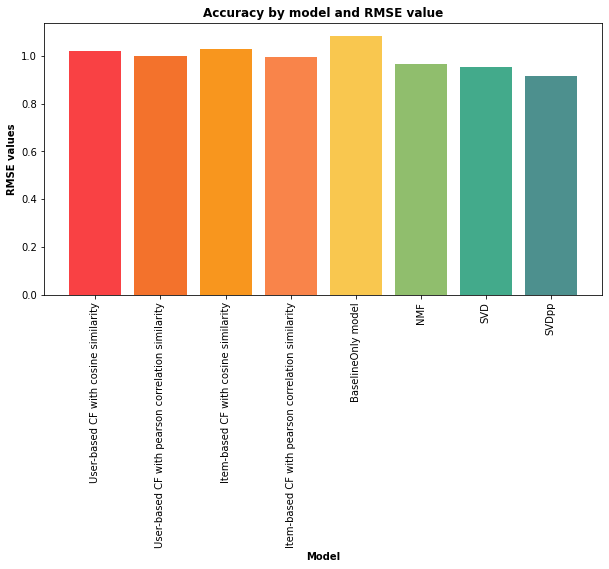

In [50]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,RMSE_values,color=['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f','#90be6d', '#43aa8b', '#4d908e'])
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("RMSE values", fontweight='bold')
ax.set_title('Accuracy by model and RMSE value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs MAE values

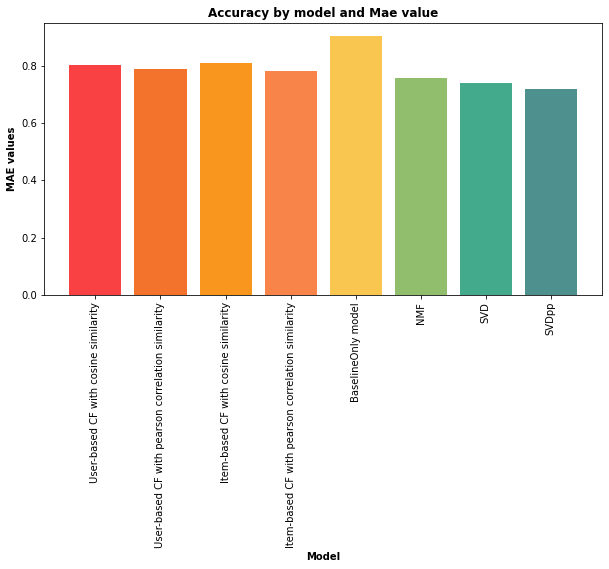

In [51]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,mae_values,color=['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f','#90be6d', '#43aa8b', '#4d908e'])
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("MAE values", fontweight='bold')
ax.set_title('Accuracy by model and Mae value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs Fit-time values

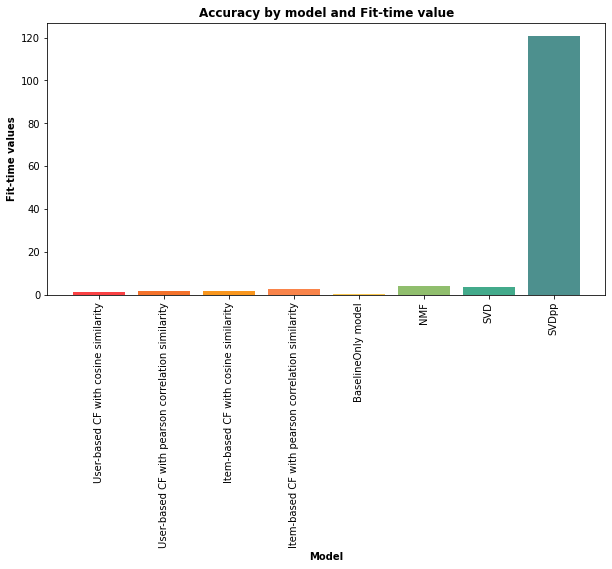

In [52]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.bar(benchmark_metrics,fit_time_values,color=['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f','#90be6d', '#43aa8b', '#4d908e'])
ax.set_xlabel("Model", fontweight='bold')
ax.set_ylabel("Fit-time values", fontweight='bold')
ax.set_title('Accuracy by model and Fit-time value', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Bar graph for models Vs RMSE, MAE, Fit-time values

- Disclaimer: Units of RMSE, MAE, Fit-time are different, this is just for visualisation and for quick understanding of models accuracy and performance

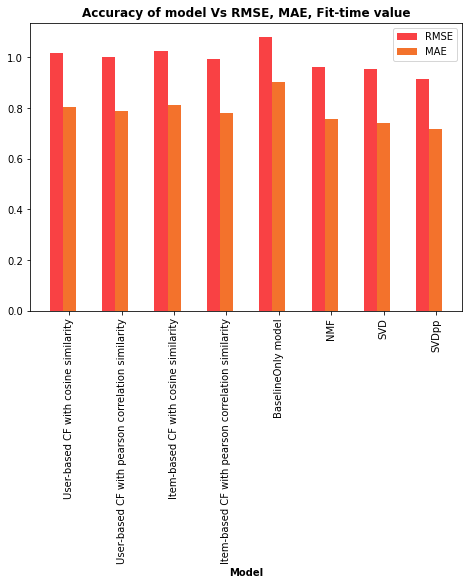

In [56]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(8)
barWidth = 0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, RMSE_values, color = '#f94144', width = 0.25, label = 'RMSE')
ax.bar(X + 0.25, mae_values, color = '#f3722c', width = 0.25, label = 'MAE')
# ax.bar(X + 0.50, fit_time_values, color = 'r', width = 0.25, label = 'Fit-time')
ax.set_title('Accuracy of model Vs RMSE, MAE, Fit-time value', fontweight='bold')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(benchmark_metrics))], benchmark_metrics, rotation=90)
plt.legend()
plt.show()